In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import json
import biomart
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
u2os_network_path = Path.cwd() / "u2os.cx"
u2os_cx = json.load(open(u2os_network_path, "r"))
for data_block in u2os_cx:
    print(data_block.keys())
nodes = u2os_cx[2]["nodes"]
edges = u2os_cx[3]["edges"]
net_attr = u2os_cx[4]["networkAttributes"]
node_attr = u2os_cx[5]["nodeAttributes"]
edge_attr = u2os_cx[6]["edgeAttributes"]
cyTableColumn = u2os_cx[7]["cyTableColumn"]
cartesianLayout = u2os_cx[9]["cartesianLayout"]

dict_keys(['numberVerification'])
dict_keys(['metaData'])
dict_keys(['nodes'])
dict_keys(['edges'])
dict_keys(['networkAttributes'])
dict_keys(['nodeAttributes'])
dict_keys(['edgeAttributes'])
dict_keys(['cyTableColumn'])
dict_keys(['cyVisualProperties'])
dict_keys(['cartesianLayout'])
dict_keys(['status'])


In [4]:
print(nodes[0].keys())
print(edges[0].keys())
print(net_attr[0].keys(), net_attr[0])
print(node_attr[0].keys())
print(edge_attr[0].keys())
print(cyTableColumn[0].keys(), cyTableColumn[0])
print(cartesianLayout[0].keys(), cartesianLayout[0])

dict_keys(['@id', 'n'])
dict_keys(['@id', 's', 't', 'i'])
dict_keys(['n', 'v', 'd']) {'n': ' HCX::modelFileCount', 'v': '2', 'd': 'integer'}
dict_keys(['po', 'n', 'v', 'd'])
dict_keys(['po', 'n', 'v'])
dict_keys(['applies_to', 'n']) {'applies_to': 'node_table', 'n': 'shared name'}
dict_keys(['node', 'x', 'y', 'z']) {'node': 17053, 'x': 1550.4083765960531, 'y': 602.3162850498338, 'z': 0.0}


In [5]:
node_table_file = Path.cwd() / "u2os_node_table.csv"
node_table = pd.read_csv(node_table_file)
node_table.head()

,__isKnown,Annotation,CD_MemberList,corum_adjPvalues,corum_gene_overlaps,corum_jaccard_indexes,corum_terms,estimated_size_nm,FINAL ANSWER ROUND 1,GO_cc_adjPvalues,...,median_sim,MuSIC_robustness,name,network_edges.MuSIC,network_edges.ppi_img,network_edges.ppi_img.four_edges,ppi_robustness,selected,shared name,tsize
0,0,NaN,ASPH ATP2A1 BCAP31 CALR CALU CHM CYFIP2 DNAJB1...,NaN,NaN,NaN,NaN,37.653560,NaN,NaN,...,0.732,0.830000,Cluster5-1,https://www.ndexbio.org/viewer/networks/c646b9...,https://www.ndexbio.org/viewer/networks/a1ef3e...,https://test.ndexbio.org/viewer/networks/9132a...,0.000000,False,Cluster5-1,29
1,0,NaN,SPAG1 HSPA2 HSPA8 DPH2 HSPA4 BAG1 BCL9L HSF1 H...,NaN,NaN,NaN,NaN,16.899976,NaN,NaN,...,0.694,0.703333,Cluster2-33,https://www.ndexbio.org/viewer/networks/b5c283...,https://www.ndexbio.org/viewer/networks/675efc...,https://test.ndexbio.org/viewer/networks/228fd...,0.536667,False,Cluster2-33,15
2,0,NaN,SHMT1 TRAPPC4 CKS2 CKS1B CIAO3 CCNB1 SKP1 EEF1...,NaN,NaN,NaN,NaN,98.530323,Cell cycle regulation systems,4.50e-14 | 8.25e-14 | 3.57e-09,...,0.613,0.990000,Cluster1-4,https://www.ndexbio.org/viewer/networks/c6228f...,https://www.ndexbio.org/viewer/networks/9ea459...,https://test.ndexbio.org/viewer/networks/98314...,0.956667,False,Cluster1-4,64
3,0,NaN,NACC1 TTC5 WDR81 ZNF281,NaN,NaN,NaN,NaN,3.390965,NaN,NaN,...,0.741,0.250000,Cluster2-71,https://www.ndexbio.org/viewer/networks/b5a07c...,https://www.ndexbio.org/viewer/networks/641ec5...,https://test.ndexbio.org/viewer/networks/294c1...,0.000000,False,Cluster2-71,4
4,0,NaN,CRELD1 GSTM3 TTK RPL35 RPL10L EIF4G1 NFU1 RPL1...,1.36e-14 | 2.07e-09 | 7.90e-11 | 4.19e-04 | 7....,RPS10 RPL35 RPL30 RPS11 RPL14 RPL13 RPL18 RPS8...,0.243 | 0.214 | 0.148 | 0.136 | 0.125,"Ribosome, cytoplasmic | 60S ribosomal subunit,...",16.899976,Ribosome associated proteins,1.38e-16 | 2.46e-11 | 6.44e-04 | 8.46e-09 | 5....,...,0.740,0.913333,Cluster5-3,https://www.ndexbio.org/viewer/networks/c5fc90...,https://www.ndexbio.org/viewer/networks/9b4920...,https://test.ndexbio.org/viewer/networks/9f096...,0.000000,False,Cluster5-3,15


# Add CCD column to the node table

In [6]:
ccd_data_file = Path("/Users/ishangaur/CellCyclePlottingDataframes/ProteinPseudotimePlotting.tsv")
ccd_data = pd.read_csv(ccd_data_file, sep="\t")
ccd_data.head()

,ENSG,Antibody,Compartment,CCD,cell_pseudotime,cell_intensity,cell_fred,cell_fgreen,mvavg_x,mvavg_y,mvavgs_10p,mvavgs_90p,mvavgs_25p,mvavgs_75p,phase,gini,percent_variance,WellPlate
0,ENSG00000158321,HPA000390,Nuc,Pseudotime,"0.985,0.98,0.958,0.956,0.939,0.918,0.906,0.886...","0.7390379271165064,0.26638857293726376,0.23516...","-0.3367071628231325,-0.2537370752453728,-0.327...","0.16949821761323114,0.15437852625202098,0.2811...","0.9273,0.9158999999999999,0.9047000000000001,0...","0.5159648053986967,0.4660035371680031,0.466981...","0.23422860850573798,0.23422860850573798,0.2342...","0.7100372240546419,0.6975376607329703,0.697537...","0.27670764279798576,0.24616607684149372,0.2486...","0.6955110140225208,0.6840873393518287,0.684087...","G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G...",0.259460,0.075247,A01_55185977
1,ENSG00000136108,HPA008410,Cell,No,"0.999,0.999,0.999,0.999,0.998,0.997,0.996,0.99...","0.51376959183985,0.7405869142211623,0.81868294...","-0.3725437022652657,-0.6231683707284121,-0.549...","-0.23242950472018076,-0.31747863894368267,-0.1...","0.9970000000000001,0.9964000000000002,0.9956,0...","0.6817120990446968,0.6867546091391149,0.679389...","0.4806172070165337,0.5259997978662968,0.525999...","0.9654769367216557,0.9654769367216557,0.965476...","0.5686379490285043,0.5686379490285043,0.568637...","0.8439480208343555,0.8439480208343555,0.843948...","G1,G1,G1,G1,G1,G1,G1,G1,G2,G1,G1,G1,G1,G1,G1,G...",0.263932,0.162583,A01_55195978
2,ENSG00000138347,HPA036299,Nuc,No,"0.994,0.988,0.987,0.983,0.983,0.983,0.981,0.97...","0.4375524453497077,0.379598311989224,0.4250342...","-0.6154224138635805,-0.5262924859426088,-0.561...","0.13745277197115247,0.2372470014436192,0.26784...","0.9833,0.9809,0.9788,0.9768,0.9749000000000001...","0.4582648704273652,0.47214338563201247,0.47211...","0.3781681674751873,0.3781681674751873,0.377899...","0.5849546992393218,0.5883825809816025,0.588382...","0.39167250785765256,0.39167250785765256,0.3916...","0.4577311068262303,0.545106306371072,0.5451063...","G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G...",0.128947,0.169056,A01_55215982
3,ENSG00000111605,HPA039973,Nuc,No,"0.996,0.99,0.977,0.976,0.976,0.975,0.97,0.97,0...","0.8101348993256068,0.6795541246218457,0.522480...","-0.3639438962224717,-0.5128467733879262,-0.568...","0.01976830044182032,0.1974365965385232,0.36987...","0.9764,0.9727,0.9694,0.9672000000000001,0.9646...","0.6465866833930525,0.6238660102519809,0.603861...","0.5282544974850903,0.5282544974850903,0.518182...","0.7934222794495805,0.7166186783702061,0.716618...","0.5606609988735599,0.5605516964028059,0.534945...","0.7011069863235018,0.6724617441088006,0.647713...","G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G...",0.091280,0.109277,A01_55225983
4,ENSG00000106012,HPA019515,Nuc,Pseudotime,"0.989,0.984,0.982,0.978,0.971,0.967,0.952,0.94...","0.5969635594559007,0.5025506437395802,0.051360...","-0.4479913643858908,-0.413693784511982,-0.2077...","0.18321627760853776,0.21965267249632658,0.1187...","0.9633999999999999,0.9565,0.9501000000000001,0...","0.5187417333868999,0.5001823582743513,0.523089...","0.38392780352238387,0.37536885280545856,0.3753...","0.6456019456179166,0.6456019456179166,0.742913...","0.4878897119154546,0.4367612392326159,0.436761...","0.6087973121769674,0.5975933084128137,0.620809...","G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G...",0.182334,0.560001,A01_55235979


In [7]:
# add a column that converts the ensembl id to the gene code          
# Set up connection to server                                               
server = biomart.BiomartServer('http://useast.ensembl.org/biomart')         
mart = server.datasets['hsapiens_gene_ensembl']
mart.show_attributes()

{'3_utr_end': '3' UTR end' (default: False),
 '3_utr_start': '3' UTR start' (default: False),
 '3utr': '3' UTR' (default: False),
 '5_utr_end': '5' UTR end' (default: False),
 '5_utr_start': '5' UTR start' (default: False),
 '5utr': '5' UTR' (default: False),
 'abrachyrhynchus_homolog_associated_gene_name': 'Pink-footed goose gene name' (default: False),
 'abrachyrhynchus_homolog_canonical_transcript_protein': 'Query protein or transcript ID' (default: False),
 'abrachyrhynchus_homolog_chrom_end': 'Pink-footed goose chromosome/scaffold end (bp)' (default: False),
 'abrachyrhynchus_homolog_chrom_start': 'Pink-footed goose chromosome/scaffold start (bp)' (default: False),
 'abrachyrhynchus_homolog_chromosome': 'Pink-footed goose chromosome/scaffold name' (default: False),
 'abrachyrhynchus_homolog_ensembl_gene': 'Pink-footed goose gene stable ID' (default: False),
 'abrachyrhynchus_homolog_ensembl_peptide': 'Pink-footed goose protein or transcript stable ID' (default: False),
 'abrachyrh

In [8]:
print([key for key in mart.attributes.keys() if "symbol" in key])

['hgnc_symbol', 'uniprot_gn_symbol']


In [9]:
attributes = ['ensembl_gene_id', 'uniprot_gn_symbol']
# attributes = ['ensembl_transcript_id', 'uniprot_gn_symbol', 
#                   'ensembl_gene_id', 'ensembl_peptide_id']
response = mart.search({'attributes': attributes})   
data = response.raw.data.decode('ascii')

In [10]:
ensembl_to_genesymbol = {}                                                  
# Store the data in a dict                                                  
for line in data.splitlines():                                              
    line = line.split('\t')                                                 
    # The entries are in the same order as in the `attributes` variable
    # transcript_id = line[0]                                                 
    # gene_symbol = line[1]                                                   
    # ensembl_gene = line[2]                                                  
    # ensembl_peptide = line[3]                                               
    ensembl_gene = line[0]
    gene_symbol = line[1]
    if gene_symbol == "":
        continue
                                                                            
    # Some of these keys may be an empty string. If you want, you can 
    # avoid having a '' key in your dict by ensuring the 
    # transcript/gene/peptide ids have a nonzero length before
    # adding them to the dict
    # ensembl_to_genesymbol[transcript_id] = gene_symbol                      
    ensembl_to_genesymbol[ensembl_gene] = gene_symbol                       
    # ensembl_to_genesymbol[ensembl_peptide] = gene_symbol

In [11]:
print(len(set(ensembl_to_genesymbol.keys()) & set(ccd_data["ENSG"].unique())))
print(len(ccd_data["ENSG"].unique()))

1160
1166


Looks like 6 of the proteins have '' for the gene_id, we can skip these then

In [12]:
# add a gene_symbol column to the ccd_data dataframe
ccd_data["Gene"] = ccd_data["ENSG"].map(ensembl_to_genesymbol)
print(ccd_data["Gene"].isna().sum())
ccd_data.head()
ccd_data.to_csv(ccd_data_file.with_suffix(".csv"), index=False)

6


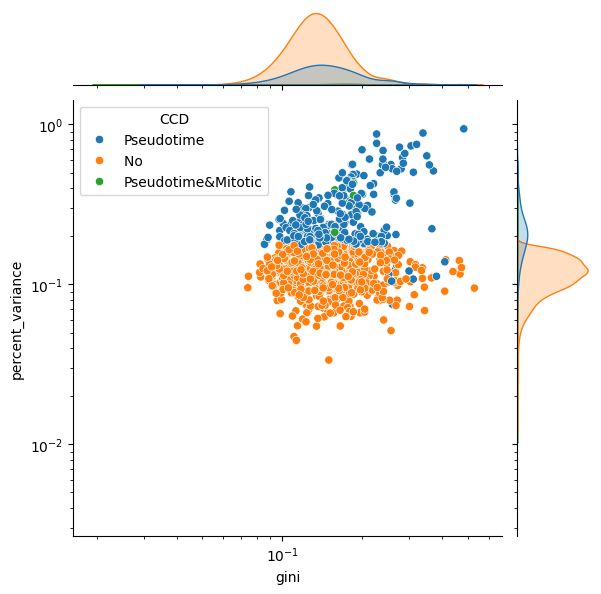

In [13]:
sns.jointplot(x="gini", y="percent_variance", data=ccd_data, hue="CCD")
plt.xscale("log")
plt.yscale("log")

# CCD Enrichment

In [56]:
# node_table_file = "sc_node_attributes_986625.csv"
node_table_file = Path.cwd() / "u2os_node_table.csv"
ccd_data_file = Path("/Users/ishangaur/CellCyclePlottingDataframes/ProteinPseudotimePlotting.csv")
ccd_data = pd.read_csv(ccd_data_file)
node_table = pd.read_csv(node_table_file)
print(node_table.columns)

Index(['__isKnown', 'Annotation', 'CD_MemberList', 'corum_adjPvalues',
       'corum_gene_overlaps', 'corum_jaccard_indexes', 'corum_terms',
       'estimated_size_nm', 'FINAL ANSWER ROUND 1', 'GO_cc_adjPvalues',
       'GO_cc_descriptions', 'GO_cc_gene_overlaps', 'GO_cc_jaccard_indexes',
       'GO_cc_terms', 'HCX::interactionNetworkUUID', 'HCX::memberName',
       'hidef_stability', 'HPA_adjPvalues', 'HPA_gene_overlaps',
       'HPA_jaccard_indexes', 'HPA_terms', 'img_robustness', 'label',
       'max_jaccard_index', 'median_sim', 'MuSIC_robustness', 'name',
       'network_edges.MuSIC', 'network_edges.ppi_img',
       'network_edges.ppi_img.four_edges', 'ppi_robustness', 'selected',
       'shared name', 'CD_MemberList_Size', 'CCD_frac', 'member_ct'],
      dtype='object')


In [63]:
# just get name and CD_MemberList columnes
node_genelist = node_table
# node_genelist = node_genelist.rename(columns={"tsize": "CD_MemberList_Size", "hidef_stability": "HiDeF_persistence"})
node_genelist.head()

,__isKnown,Annotation,CD_MemberList,corum_adjPvalues,corum_gene_overlaps,corum_jaccard_indexes,corum_terms,estimated_size_nm,FINAL ANSWER ROUND 1,GO_cc_adjPvalues,...,name,network_edges.MuSIC,network_edges.ppi_img,network_edges.ppi_img.four_edges,ppi_robustness,selected,shared name,CD_MemberList_Size,CCD_frac,member_ct
0,0,NaN,ASPH ATP2A1 BCAP31 CALR CALU CHM CYFIP2 DNAJB1...,NaN,NaN,NaN,NaN,37.653560,NaN,NaN,...,Cluster5-1,https://www.ndexbio.org/viewer/networks/c646b9...,https://www.ndexbio.org/viewer/networks/a1ef3e...,https://test.ndexbio.org/viewer/networks/9132a...,0.000000,False,Cluster5-1,29,0.068966,29
1,0,NaN,SPAG1 HSPA2 HSPA8 DPH2 HSPA4 BAG1 BCL9L HSF1 H...,NaN,NaN,NaN,NaN,16.899976,NaN,NaN,...,Cluster2-33,https://www.ndexbio.org/viewer/networks/b5c283...,https://www.ndexbio.org/viewer/networks/675efc...,https://test.ndexbio.org/viewer/networks/228fd...,0.536667,False,Cluster2-33,15,0.200000,15
2,0,NaN,SHMT1 TRAPPC4 CKS2 CKS1B CIAO3 CCNB1 SKP1 EEF1...,NaN,NaN,NaN,NaN,98.530323,Cell cycle regulation systems,4.50e-14 | 8.25e-14 | 3.57e-09,...,Cluster1-4,https://www.ndexbio.org/viewer/networks/c6228f...,https://www.ndexbio.org/viewer/networks/9ea459...,https://test.ndexbio.org/viewer/networks/98314...,0.956667,False,Cluster1-4,64,0.187500,64
3,0,NaN,NACC1 TTC5 WDR81 ZNF281,NaN,NaN,NaN,NaN,3.390965,NaN,NaN,...,Cluster2-71,https://www.ndexbio.org/viewer/networks/b5a07c...,https://www.ndexbio.org/viewer/networks/641ec5...,https://test.ndexbio.org/viewer/networks/294c1...,0.000000,False,Cluster2-71,4,0.000000,4
4,0,NaN,CRELD1 GSTM3 TTK RPL35 RPL10L EIF4G1 NFU1 RPL1...,1.36e-14 | 2.07e-09 | 7.90e-11 | 4.19e-04 | 7....,RPS10 RPL35 RPL30 RPS11 RPL14 RPL13 RPL18 RPS8...,0.243 | 0.214 | 0.148 | 0.136 | 0.125,"Ribosome, cytoplasmic | 60S ribosomal subunit,...",16.899976,Ribosome associated proteins,1.38e-16 | 2.46e-11 | 6.44e-04 | 8.46e-09 | 5....,...,Cluster5-3,https://www.ndexbio.org/viewer/networks/c5fc90...,https://www.ndexbio.org/viewer/networks/9b4920...,https://test.ndexbio.org/viewer/networks/9f096...,0.000000,False,Cluster5-3,15,0.000000,15


In [64]:
def members_to_ccd_frac(member_list):
    members = member_list.split(" ")
    total = len(members)
    members = [member for member in members if member in ccd_data["Gene"].unique()]
    ccd = [ccd_data.loc[ccd_data["Gene"] == member, "CCD"].values[0] for member in members]
    ccd = [ccd_val != "No" for ccd_val in ccd]
    return sum(ccd) / total

def members_to_ccd_phase(member_list):
    members = member_list.split(" ")
    total = len(members)
    members = [member for member in members if member in ccd_data["Gene"].unique()]
    ccd = [ccd_data.loc[ccd_data["Gene"] == member, "CCD"].values[0] for member in members]
    ccd = [ccd_val != "No" for ccd_val in ccd]
    if sum(ccd) / total > 0.5:
        return "S"
    else:
        return "G1"

node_genelist["CCD_frac"] = node_genelist["CD_MemberList"].apply(members_to_ccd_frac)

In [65]:
# proportion of ccd genes
print(sum(ccd_data["CCD"] != "Pseudotime") / len(ccd_data))
print(node_genelist.sort_values(by="CD_MemberList_Size", ascending=False).iloc[0])
prop_ccd = node_genelist.sort_values(by="CD_MemberList_Size", ascending=False).iloc[0]["CCD_frac"]

0.7341337907375644
__isKnown                                                                           0
Annotation                                                                       Cell
CD_MemberList                       STRN SMG9 LRRC15 INTS14 PTGR3 DBT CLINT1 ACBD6...
corum_adjPvalues                                                                  NaN
corum_gene_overlaps                                                               NaN
corum_jaccard_indexes                                                             NaN
corum_terms                                                                       NaN
estimated_size_nm                                                        20885.242929
FINAL ANSWER ROUND 1                                                             Cell
GO_cc_adjPvalues                                                                  NaN
GO_cc_descriptions                                                                NaN
GO_cc_gene_overlaps                

Index(['__isKnown', 'Annotation', 'CD_MemberList', 'corum_adjPvalues',
       'corum_gene_overlaps', 'corum_jaccard_indexes', 'corum_terms',
       'estimated_size_nm', 'FINAL ANSWER ROUND 1', 'GO_cc_adjPvalues',
       'GO_cc_descriptions', 'GO_cc_gene_overlaps', 'GO_cc_jaccard_indexes',
       'GO_cc_terms', 'HCX::interactionNetworkUUID', 'HCX::memberName',
       'HiDeF_persistence', 'HPA_adjPvalues', 'HPA_gene_overlaps',
       'HPA_jaccard_indexes', 'HPA_terms', 'img_robustness', 'label',
       'max_jaccard_index', 'median_sim', 'MuSIC_robustness', 'name',
       'network_edges.MuSIC', 'network_edges.ppi_img',
       'network_edges.ppi_img.four_edges', 'ppi_robustness', 'selected',
       'shared name', 'CD_MemberList_Size', 'CCD_frac', 'member_ct'],
      dtype='object')


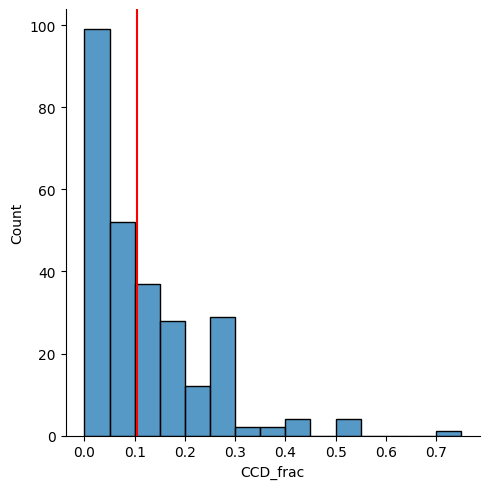

<Figure size 640x480 with 0 Axes>

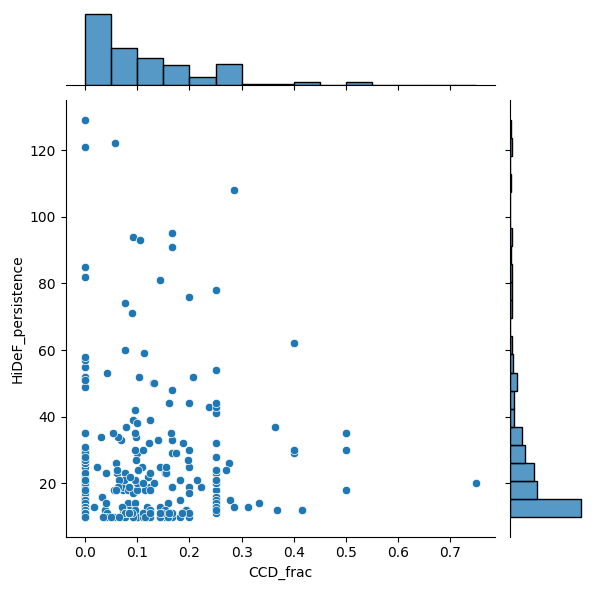

In [67]:
joint_node_table = node_genelist
print(joint_node_table.columns)
joint_node_table["member_ct"] = joint_node_table["CD_MemberList"].apply(lambda x: len(x.split(" ")))
sns.displot(joint_node_table["CCD_frac"])
# vertical red line at actual proportion of CCD genes
plt.axvline(x=prop_ccd, color="red")
plt.show()
plt.show()
plt.clf()
sns.jointplot(x="CCD_frac", y="HiDeF_persistence", data=joint_node_table)
# plt.yscale("log")


In [68]:
joint_node_table.to_csv(node_table_file, index=False)